**Problem Statement**: A Mobile Phone manufacturing company wants to launch its three brand new phone into the market, but before going with its traditional marketing approach this time it want to analyze the data of its previous model sales in different regions and you have been hired as an Data Scientist to help them out, use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.
 myphonedata.csv

In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
phone= pd.read_csv(r"C:\Users\SALLA BHAVANA\Desktop\data science\Association Rules unsupervised\Datasets_Association Rules\myphonedata.csv")

In [3]:
phone.columns

Index(['V1', 'V2', 'V3', 'red', 'white', 'green', 'yellow', 'orange', 'blue'], dtype='object')

In [5]:
phone1= phone.iloc[: , 3:]

In [6]:
phone1.columns

Index(['red', 'white', 'green', 'yellow', 'orange', 'blue'], dtype='object')

In [7]:
phone1.isnull().sum()

red       0
white     0
green     0
yellow    0
orange    0
blue      0
dtype: int64

In [17]:
frequent_itemsets = apriori(phone1, min_support=0.0025, max_len=4 ,use_colnames = True)

In [18]:
frequent_itemsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(white, red)"
7,0.090909,"(green, red)"
8,0.090909,"(orange, red)"
9,0.363636,"(blue, red)"


In [19]:
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

In [20]:
frequent_itemsets

,support,itemsets
1,0.636364,(white)
0,0.545455,(red)
5,0.545455,(blue)
6,0.363636,"(white, red)"
9,0.363636,"(blue, red)"
12,0.363636,"(white, blue)"
2,0.181818,(green)
4,0.181818,(orange)
11,0.181818,"(white, orange)"
15,0.181818,"(white, blue, red)"


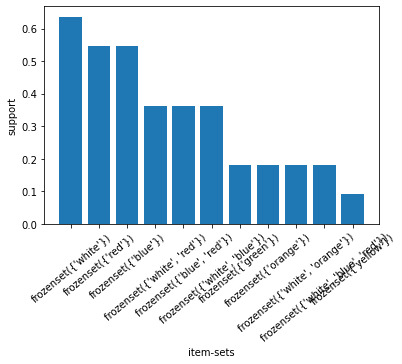

In [24]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=40)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [25]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

In [26]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
7,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
8,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
9,"(green, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf


In [27]:
rules.sort_values('lift', ascending =False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(red),"(green, white)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909
8,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
16,(white),"(orange, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
12,(white),"(green, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
9,"(green, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
15,"(orange, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
7,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
11,(green),"(white, red)",0.181818,0.363636,0.090909,0.500000,1.375000,0.024793,1.272727
14,"(white, red)",(orange),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909


In [28]:
def to_list(i):
    return (sorted(list(i)))

In [29]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [30]:
ma_X = ma_X.apply(sorted)

In [31]:
rules_sets = list(ma_X)

In [32]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [33]:
index_rules = []

In [34]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [35]:
rules_no_redudancy = rules.iloc[index_rules, :]

In [36]:
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
14,"(white, red)",(orange),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909
2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
